<h1> Used Electric Vehicle Data Analysis </h1>

<h2> Project Overview </h2>

This project analyzes the used electric vehicle market in the United States. As the demand for electric vehicles continues to grow due to enviromental benefits, fuel cost savings, and tax breaks so will the used electric vehicle market. In order to help potential used electrical vehicle buyers, this project will analyze the different trends in the used electric vehicle market and create a price prediction model for electrical vehicles. Using the prediction model and the data analysis in this project, potential buyers can determine if a used electrical vehicle is a good deal or not. The dataset we are using is from Kaggle and was posted by Andrei Novikov. The datatset was created by web scraping the website cars.com and was last updated in April 2023.

<h2> Problem Statement </h2>

The goal of this project is to analyze the electric vehicle used car market and create a price prediction model to help buyers make a good purchase. The steps to complete this project are as follows:

**1.** Exploratory Data Analysis - Here we will 



<h3> Import Libraries and Data </h3>

In [266]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import squarify

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb


In [267]:
df = pd.read_csv('cars.csv')

df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


<h3> Exploratory Analysis Part 1: The Initial Dataset</h3>

**1.** How big is the initial dataset?

In [268]:
df.shape


(762091, 20)

**2.** What are the column types in the initial dataset?

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

**3.** How many unique values are in each column?

In [270]:
df.nunique(axis=0)

manufacturer               30
model                   12187
year                      100
mileage                158751
engine                   6903
transmission             1313
drivetrain                 33
fuel_type                  36
mpg                       865
exterior_color           7681
interior_color           4679
accidents_or_damage         2
one_owner                   2
personal_use_only           2
seller_name             18254
seller_rating              41
driver_rating              35
driver_reviews_num        369
price_drop               6404
price                   63464
dtype: int64

**4.** What are some general statistics about the columns that only have numerical values?

In [271]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,761585.000000,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,762091.000000
mean,2017.791398,55781.692701,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,36488.983085
std,5.110532,43557.883284,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1984183.263099
min,1915.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000
25%,2016.000000,23287.000000,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,19583.000000
50%,2019.000000,45596.000000,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,27989.000000
75%,2021.000000,78365.000000,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,39488.000000
max,2024.000000,1119067.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1000000000.000000


**5.** What are the top 5 fuel types represented in this dataset?

Gasoline         0.845888
Hybrid           0.038238
Diesel           0.036698
E85 Flex Fuel    0.024632
Electric         0.021247
Name: fuel_type, dtype: float64


Text(0.5, 0, 'Fuel Type')

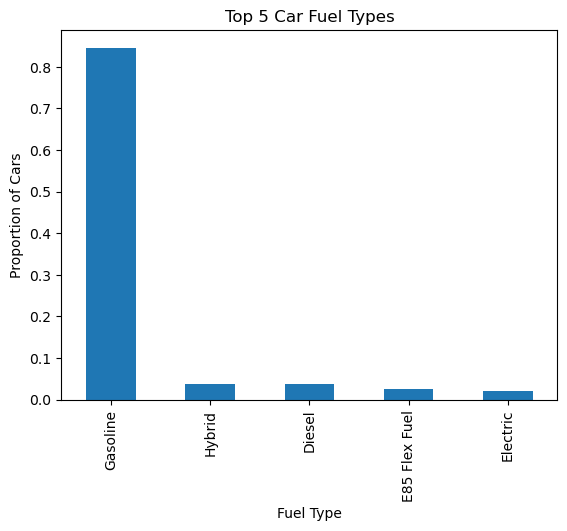

In [272]:
car_type_counts = df.fuel_type.value_counts()[:5]
print(car_type_counts/df.shape[0])
(car_type_counts/df.shape[0]).plot(kind="bar")
plt.title("Top 5 Car Fuel Types")
plt.ylabel('Proportion of Cars')
plt.xlabel('Fuel Type')

<h3> Exploratory Analysis Part 2: The dataset that only has electric vehicles</h3>

First, lets create a new Dataframe that only includes electric vehicles.

In [273]:
electric_cars = df.loc[df['fuel_type'] == 'Electric']

electric_cars.head()


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
8497,Audi,RS e-tron GT Base,2022,1502.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Suzuka Gray Metallic,Black / Express Red,0.0,1.0,1.0,Elliott Bay Auto Brokers,4.7,NaN,0.0,6000.0,132880.0
8498,Audi,RS e-tron GT Base,2022,11020.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Daytona Gray Pearl Effect,Arras Red,0.0,1.0,1.0,Audi South Atlanta,3.8,NaN,0.0,10000.0,119985.0
8499,Audi,RS e-tron GT Base,2022,6741.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Mythos Black Metallic,Black / Express Red,0.0,1.0,0.0,Audi Norwell,3.3,NaN,0.0,3020.0,116980.0
8500,Audi,RS e-tron GT Base,2022,7822.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Ascari Blue Metallic,Black,0.0,1.0,1.0,Audi Tysons Corner,4.9,NaN,0.0,905.0,118820.0
8502,Audi,RS e-tron GT Base,2022,2319.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Mythos Black Metallic,Black / Express Red,0.0,1.0,1.0,Alpha One Motors,NaN,NaN,0.0,NaN,137888.0


**1.** How many electric vehicles do we have in our new dataframe?

In [274]:
electric_cars.shape

(16192, 20)

**2.** How many unique values are in each column?

In [275]:
electric_cars.nunique(axis=0)

manufacturer              19
model                    346
year                      14
mileage                13878
engine                   160
transmission              36
drivetrain                10
fuel_type                  1
mpg                        0
exterior_color           582
interior_color           253
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_name             5629
seller_rating             41
driver_rating             19
driver_reviews_num        49
price_drop              2178
price                   7520
dtype: int64

**3.** What are some general statistics about the columns that only have numerical values?

In [276]:
electric_cars.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,16192.000000,16186.000000,15358.000000,15192.000000,15356.000000,12383.000000,14503.000000,16192.000000,10206.000000,16192.000000
mean,2019.609684,27372.064500,0.118505,0.684834,0.834592,4.144262,4.469875,19.707819,1528.438272,46109.309536
std,2.583342,24761.724235,0.323216,0.464597,0.371560,0.817439,0.382721,25.101138,1886.799860,27439.581177
min,2010.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,4100.000000
25%,2018.000000,8658.500000,0.000000,0.000000,1.000000,3.800000,4.200000,4.000000,500.000000,27998.000000
50%,2020.000000,20769.000000,0.000000,1.000000,1.000000,4.500000,4.500000,13.000000,1000.000000,40778.000000
75%,2022.000000,39358.250000,0.000000,1.000000,1.000000,4.700000,4.800000,25.250000,2000.000000,54328.500000
max,2023.000000,330022.000000,1.000000,1.000000,1.000000,5.000000,5.000000,193.000000,50000.000000,333333.000000


**4.** Which columns have no missing values?

In [277]:
#columns that do not have any missing values
electric_cars.loc[:,electric_cars.isna().sum() == 0].columns

Index(['manufacturer', 'model', 'year', 'fuel_type', 'driver_reviews_num',
       'price'],
      dtype='object')

**5.** Which columns have missing values, and what percent of the values are missing in the columns that do have missing values?

In [278]:
#columns that have missing values
electric_cars.loc[:,electric_cars.isna().mean() != 0].isna().mean()

mileage                0.000371
engine                 0.007164
transmission           0.002779
drivetrain             0.006917
mpg                    1.000000
exterior_color         0.016304
interior_color         0.084054
accidents_or_damage    0.051507
one_owner              0.061759
personal_use_only      0.051630
seller_name            0.031497
seller_rating          0.235240
driver_rating          0.104311
price_drop             0.369689
dtype: float64

**6.** Which manufacturer has the most and least used electric vehicles for sale?

In [279]:
e_car_type_counts = electric_cars.manufacturer.value_counts()

print(e_car_type_counts/electric_cars.shape[0])

Tesla            0.362648
Ford             0.110363
Nissan           0.109066
Chevrolet        0.071949
BMW              0.057868
Volkswagen       0.054163
Kia              0.052989
Porsche          0.041811
Audi             0.039279
Hyundai          0.033288
Mercedes-Benz    0.025383
Volvo            0.015625
Toyota           0.013402
Jaguar           0.003706
Cadillac         0.003273
GMC              0.001729
Subaru           0.001667
Mitsubishi       0.000926
Mazda            0.000865
Name: manufacturer, dtype: float64


Below is a nice visual called a treemap, that shows how well represented the manufacturers are in the used electric vehicle market

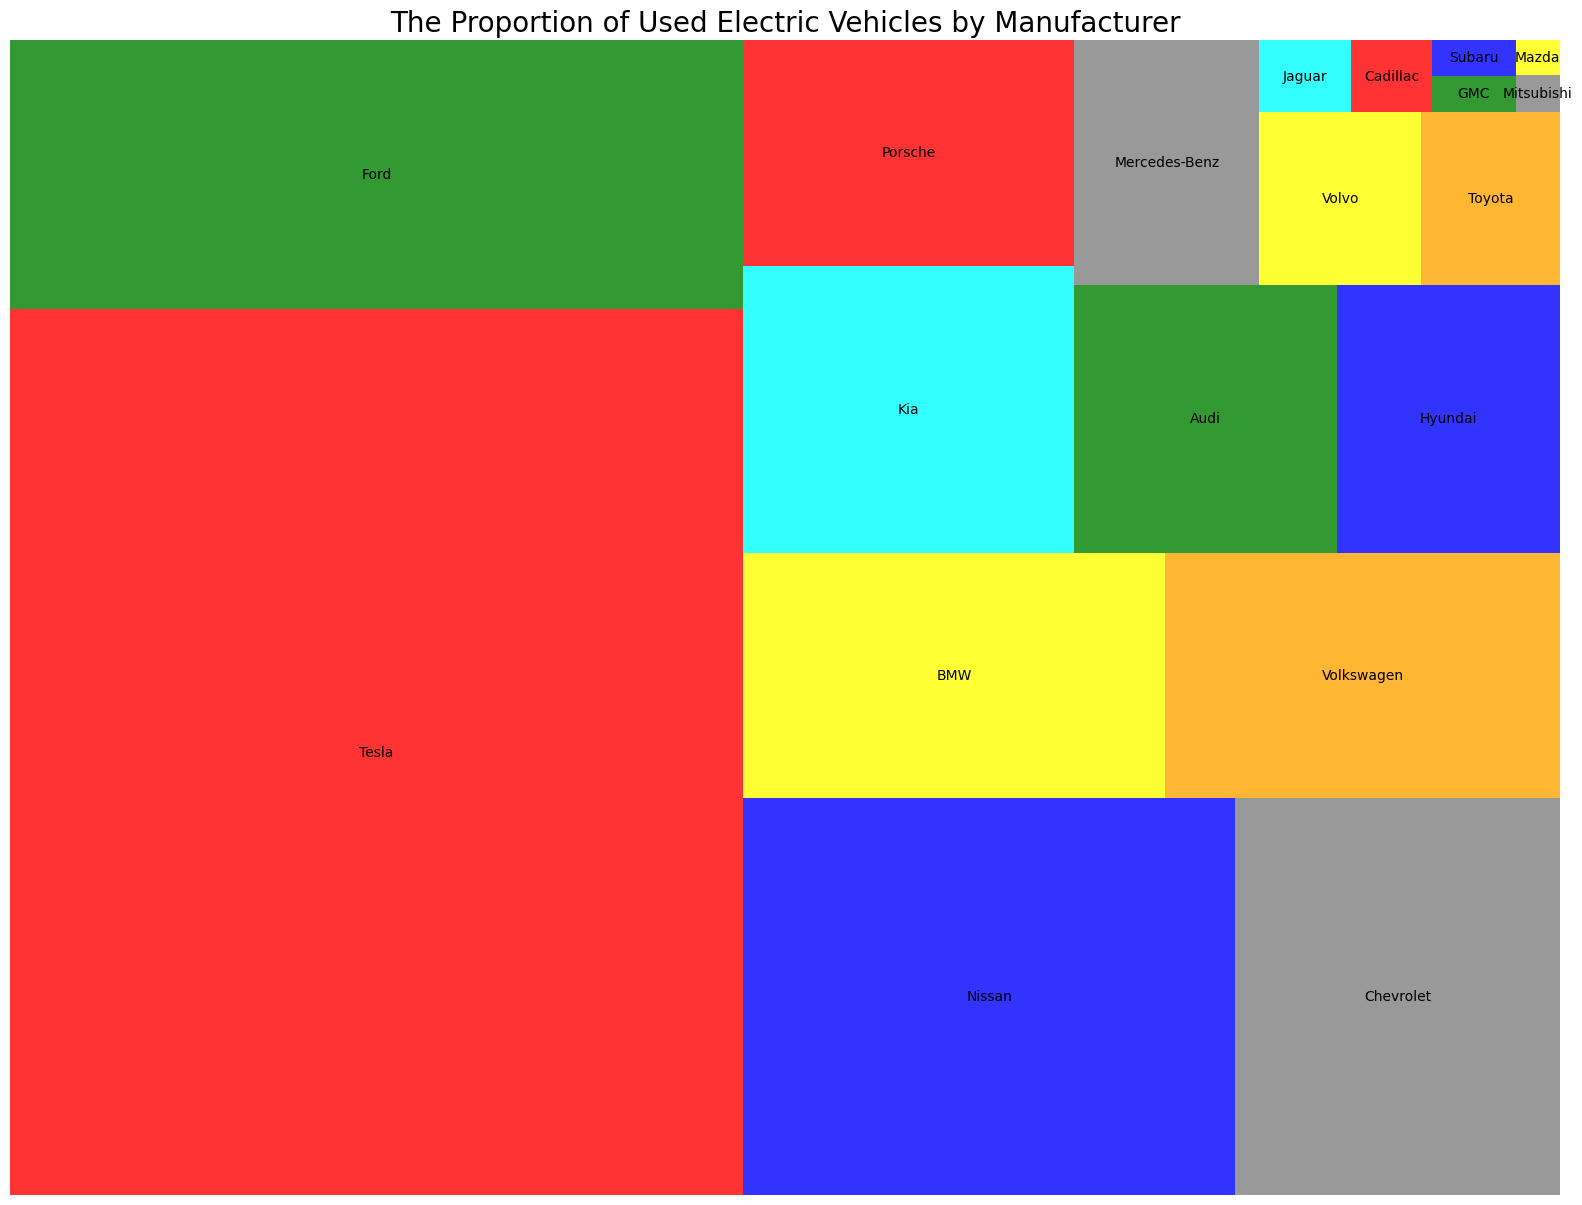

In [280]:
fig, ax = plt.subplots(1, figsize = (20,15))
squarify.plot(sizes = e_car_type_counts.values, label = e_car_type_counts.index, alpha = 0.8, color=['red','green','blue','grey','yellow','orange','cyan'])
plt.axis('off')
plt.title("The Proportion of Used Electric Vehicles by Manufacturer", fontsize = 20)
plt.show()

We will also add a heatmap to see if there are any relationships between the columns with only numerical data.

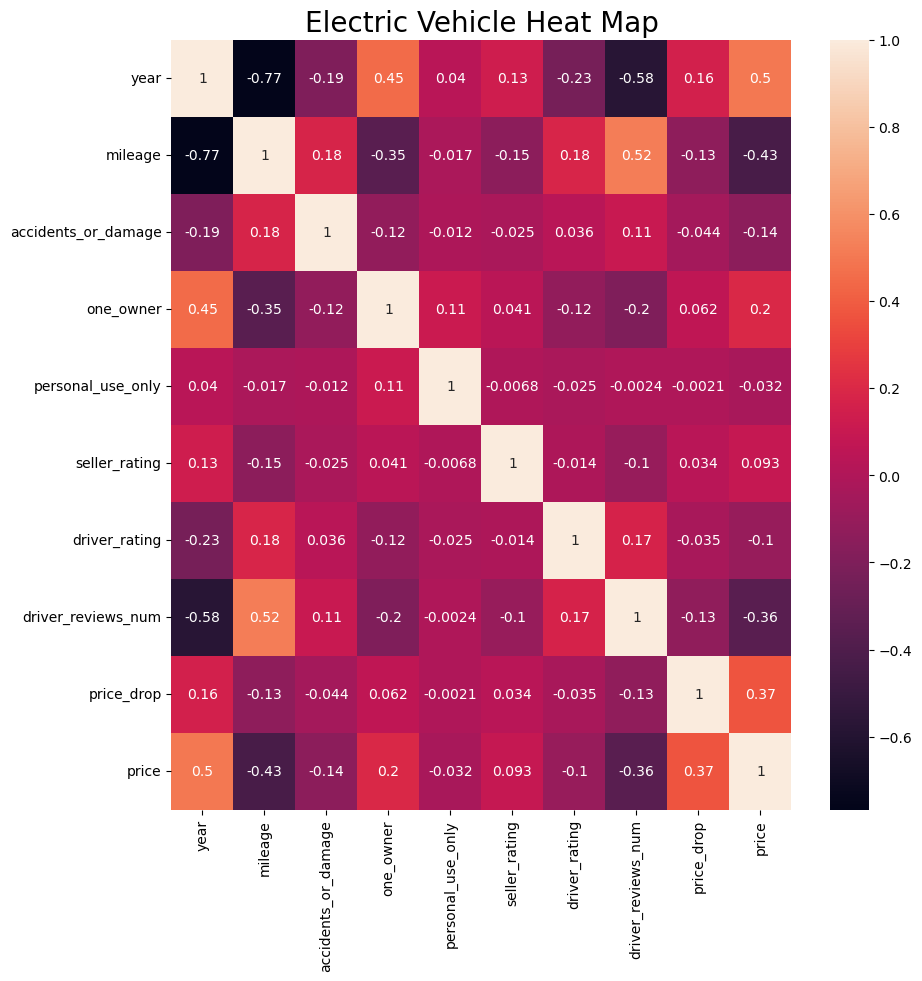

In [281]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(electric_cars.corr(method='pearson',numeric_only=True), annot=True, ax=ax)
plt.title('Electric Vehicle Heat Map', fontsize=20)
plt.show()


Lets also make a scatter plot of the mileage and the price. Its a good way to see if there are any major outliers.

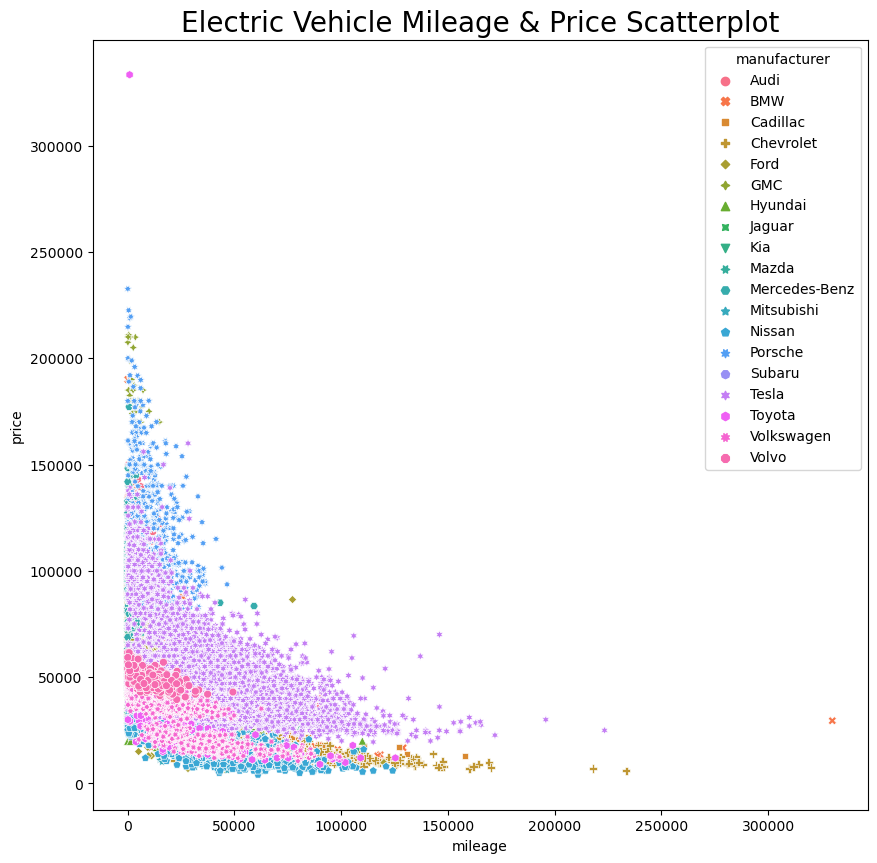

In [282]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="mileage", y="price", data=electric_cars, hue="manufacturer", style='manufacturer', ax=ax)
plt.title('Electric Vehicle Mileage & Price Scatterplot', fontsize=20)
plt.show()

<h3> Clean the Data </h3>

Lets start with the easy ones. From our exploratory analysis we can remove mpg and fuel type since both of those columns only have one value. I also think its a good idea to remove the seller_name feature, as this features would insert quite a bit of noise in our prediction models.

In [283]:
electric_cars = electric_cars.drop(['mpg','fuel_type','seller_name'], axis=1)
electric_cars.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
8497,Audi,RS e-tron GT Base,2022,1502.0,Electric,2-Speed Automatic,All-wheel Drive,Suzuka Gray Metallic,Black / Express Red,0.0,1.0,1.0,4.7,NaN,0.0,6000.0,132880.0
8498,Audi,RS e-tron GT Base,2022,11020.0,Electric,2-Speed Automatic,All-wheel Drive,Daytona Gray Pearl Effect,Arras Red,0.0,1.0,1.0,3.8,NaN,0.0,10000.0,119985.0
8499,Audi,RS e-tron GT Base,2022,6741.0,Electric,2-Speed Automatic,All-wheel Drive,Mythos Black Metallic,Black / Express Red,0.0,1.0,0.0,3.3,NaN,0.0,3020.0,116980.0
8500,Audi,RS e-tron GT Base,2022,7822.0,Electric,2-Speed Automatic,All-wheel Drive,Ascari Blue Metallic,Black,0.0,1.0,1.0,4.9,NaN,0.0,905.0,118820.0
8502,Audi,RS e-tron GT Base,2022,2319.0,Electric,2-Speed Automatic,All-wheel Drive,Mythos Black Metallic,Black / Express Red,0.0,1.0,1.0,NaN,NaN,0.0,NaN,137888.0


To fill in the missing values for the mileage, we could determine the median mile value for each year.

Text(0.5, 0, 'Year')

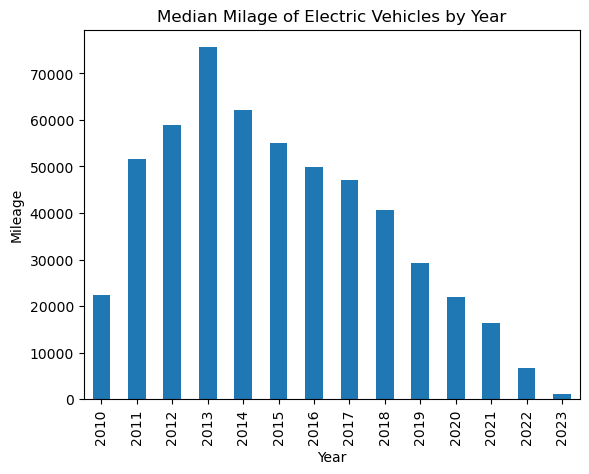

In [284]:
mileage_by_year = electric_cars.groupby('year').median(numeric_only = True)['mileage']
mileage_by_year.plot(kind='bar')
plt.title("Median Milage of Electric Vehicles by Year")
plt.ylabel('Mileage')
plt.xlabel('Year')

On a side note, its interesting how the median value of the mileage goes down at year 2012. The mileage of 2012 is much less than 2013 and less than 2014. This could be due to technological advancements or due to the fact that more consumers where driving electric vehicles more often. 

Now lets fill in the median mile values we obtained anywhere there is a mileage missing in our dataset.

In [285]:
#Using the median mileage of each year to fill in the missing values 
electric_cars['mileage'] = electric_cars.apply(lambda row: mileage_by_year.loc[row['year']] if pd.isna(row['mileage']) else row['mileage'], axis=1)


Next lets take a look at the missing values for the engine.

In [286]:
electric_cars.engine.value_counts()

Electric                                       14336
Electric Motor                                   502
0.0                                              203
2.0L I4 OHV Electric                              92
271.0HP Electric Motor Electric Fuel System       64
                                               ...  
Electric ZEV 536hp                                 1
536.0HP Electric Motor Electric Fuel System        1
Electric ZEV 288hp                                 1
Engine: 239KW 320HP TQ Electric                    1
Not Specified                                      1
Name: engine, Length: 160, dtype: int64

In [287]:
electric_cars.engine.value_counts()/electric_cars.shape[0]

Electric                                       0.885375
Electric Motor                                 0.031003
0.0                                            0.012537
2.0L I4 OHV Electric                           0.005682
271.0HP Electric Motor Electric Fuel System    0.003953
                                                 ...   
Electric ZEV 536hp                             0.000062
536.0HP Electric Motor Electric Fuel System    0.000062
Electric ZEV 288hp                             0.000062
Engine: 239KW 320HP TQ Electric                0.000062
Not Specified                                  0.000062
Name: engine, Length: 160, dtype: float64

For the motor feature, it seems like over 90% of the values are either electric or electric motors. Since this column has very poor variability, we will drop this column.

In [288]:
electric_cars = electric_cars.drop(['engine'], axis=1)

Next lets look at the values for the transmission feature.

In [289]:
electric_cars.transmission.value_counts()

1-Speed Automatic                 12563
Automatic                          2035
2-Speed Automatic                   628
A/T                                 274
1-Speed A/T                         237
Automatic CVT                       154
Single-Speed Automatic               42
SINGLE-SPEED TRANSMISSION            34
Automatic 1-Speed                    24
Single-Speed Fixed Gear              24
Single Speed Reducer                 20
SINGLE SPEED FIXED GEAR              13
SINGLE SPEED REDUCER                 12
1-SPEED A/T                          11
CVT                                   7
Inductive Technology System           7
2-Speed A/T                           6
AUTOMATIC                             6
1-Speed Direct-Drive Automatic        6
SINGLE SPEED REDUCTION GEAR           5
automatic                             5
Automatic, 1-Spd                      5
1-Speed                               4
Continuously Variable                 3
SINGLE SPEED                          3


In [290]:
electric_cars.transmission.value_counts()/electric_cars.shape[0]

1-Speed Automatic                 0.775877
Automatic                         0.125679
2-Speed Automatic                 0.038785
A/T                               0.016922
1-Speed A/T                       0.014637
Automatic CVT                     0.009511
Single-Speed Automatic            0.002594
SINGLE-SPEED TRANSMISSION         0.002100
Automatic 1-Speed                 0.001482
Single-Speed Fixed Gear           0.001482
Single Speed Reducer              0.001235
SINGLE SPEED FIXED GEAR           0.000803
SINGLE SPEED REDUCER              0.000741
1-SPEED A/T                       0.000679
CVT                               0.000432
Inductive Technology System       0.000432
2-Speed A/T                       0.000371
AUTOMATIC                         0.000371
1-Speed Direct-Drive Automatic    0.000371
SINGLE SPEED REDUCTION GEAR       0.000309
automatic                         0.000309
Automatic, 1-Spd                  0.000309
1-Speed                           0.000247
Continuousl

In [291]:
at_trans_size = electric_cars[electric_cars['transmission'] == 'Automatic']['manufacturer'].shape[0]

In [292]:
electric_cars[electric_cars['transmission'] == 'Automatic']['manufacturer'].value_counts()/at_trans_size

Tesla            0.294840
Kia              0.121376
Ford             0.105160
BMW              0.088452
Mercedes-Benz    0.075676
Nissan           0.068796
Hyundai          0.055037
Chevrolet        0.039803
Porsche          0.035872
Volvo            0.031941
Toyota           0.028993
Volkswagen       0.021622
Audi             0.019656
Jaguar           0.004423
GMC              0.002948
Cadillac         0.002948
Subaru           0.000983
Mazda            0.000983
Mitsubishi       0.000491
Name: manufacturer, dtype: float64

For the transmission feature, 77% of the vehicles are 1-speed automatic. Then another 12% are just "Automatic". After some research on electric cars, the two speed automatic transmission option is usually for premium models. I conclude the majority of the 12% are 1-speed automatic. Alot of the other values in this column are are actually 1-speed automatic, but they are just spelled differently. We will drop this column as well.

In [293]:
electric_cars = electric_cars.drop(['transmission'], axis=1)

We will know look at the drivetrain feature. Lets see how distributed the drivetrain feature is.

In [294]:
electric_cars.drivetrain.value_counts()/electric_cars.shape[0]

All-wheel Drive                                     0.490119
Front-wheel Drive                                   0.262908
Rear-wheel Drive                                    0.226161
AWD                                                 0.005064
RWD                                                 0.003706
FWD                                                 0.003211
Four-wheel Drive                                    0.001729
Front-Wheel Drive                                   0.000062
Front-Wheel Drive with Limited-Slip Differential    0.000062
Unknown                                             0.000062
Name: drivetrain, dtype: float64

We can make a function to clean this column up a bit and handle the nan values.

In [295]:
def clean_drivetrain(x):
    '''
    This function consolidates the drivetrain column into four categories: AWD, FWD, RWD, and Unknown.

    Parameters:
    x (str): The drivetrain value

    Returns:
    str: The cleaned drivetrain value
    '''
    if pd.isna(x):
        return 'Unknown'
    elif 'All' in x:
        return 'AWD'
    elif 'Front' in x:
        return 'FWD'
    elif 'Rear' in x:
        return 'RWD'
    else:
        return x

In [296]:
electric_cars['drivetrain'] = electric_cars['drivetrain'].apply(clean_drivetrain)

In [297]:
electric_cars.drivetrain.value_counts()/electric_cars.shape[0]

AWD                 0.495183
FWD                 0.266243
RWD                 0.229867
Unknown             0.006979
Four-wheel Drive    0.001729
Name: drivetrain, dtype: float64

Great, now we have five possible values for the drivetrain (Down from 10) and no nan values. Lets look into the color of the car next. First lets see how many unique values are in both the exterior and interior color features

In [298]:
exterior_color = electric_cars['exterior_color'].nunique()
interior_color = electric_cars['interior_color'].nunique()

print('There are {} unique exterior colors and {} unique interior colors.'.format(exterior_color, interior_color))

There are 582 unique exterior colors and 253 unique interior colors.


Like we did for the drivetrain, lets see if we can consolidate the colors into just the basic colors (Red, Green, Blue, etc.) and also change the nan values in this column to 'Unknown'

In [299]:
def clean_colors(x):
    '''
    This function consolidates the exterior and interior color columns into base colors.

    Parameters:
    x (str): The color value

    Returns:
    str: The cleaned color value
    '''
    
    x = str(x).lower()

    if (pd.isna(x) or 'nan' in x or 'not specified' in x or 'other' in x or 'paint to sample' in x 
        or 'no color' in x or 'unspecified' in x or 'performance' in x):
        return 'Unknown'
    elif 'metallic' in x:
        return 'Metallic'
    elif 'black' in x or 'charcoal' in x:
        return 'Black'
    elif 'white' in x or 'pearl' in x:
        return 'White'
    elif 'gray' in x or 'grey' in x or 'graphite' in x:
        return 'Gray'
    elif 'silver' in x:
        return 'Silver'
    elif 'blue' in x or 'glacier' in x or 'alpine' in x or 'blu' in x:
        return 'Blue'
    elif 'red' in x or 'scarlet' in x or 'maroon' in x or 'burgundy' in x or 'sunset' in x:
        return 'Red'
    elif 'green' in x or 'lime' in x:
        return 'Green'
    elif 'brown' in x or 'bronze' in x or 'copper' in x:
        return 'Brown'
    elif 'orange' in x:
        return 'Orange'
    elif 'yellow' in x:
        return 'Yellow'
    elif 'gold' in x:
        return 'Gold'
    elif 'steel' in x:
        return 'Silver'
    elif 'platinum' in x:
        return 'Platinum'
    elif 'metal' in x or 'titanium' in x:
        return 'Metal'
    elif 'teal' in x:
        return 'Teal'
    elif 'fl' in x or 'bl' in x or '71620' in x or '94ah' in x or 'ea20' in x or 'eb20' in x:
        return 'Unknown'
    else:
        return x

In [300]:
#Applying the clean_colors function to the exterior and interior color columns

electric_cars['exterior_color'] = electric_cars['exterior_color'].apply(clean_colors)

electric_cars['interior_color'] = electric_cars['interior_color'].apply(clean_colors)

In [301]:
exterior_color = electric_cars['exterior_color'].nunique()
interior_color = electric_cars['interior_color'].nunique()

print('There are {} exterior colors and {} unique interior colors.'.format(exterior_color, interior_color))

There are 60 exterior colors and 70 unique interior colors.


<Axes: >

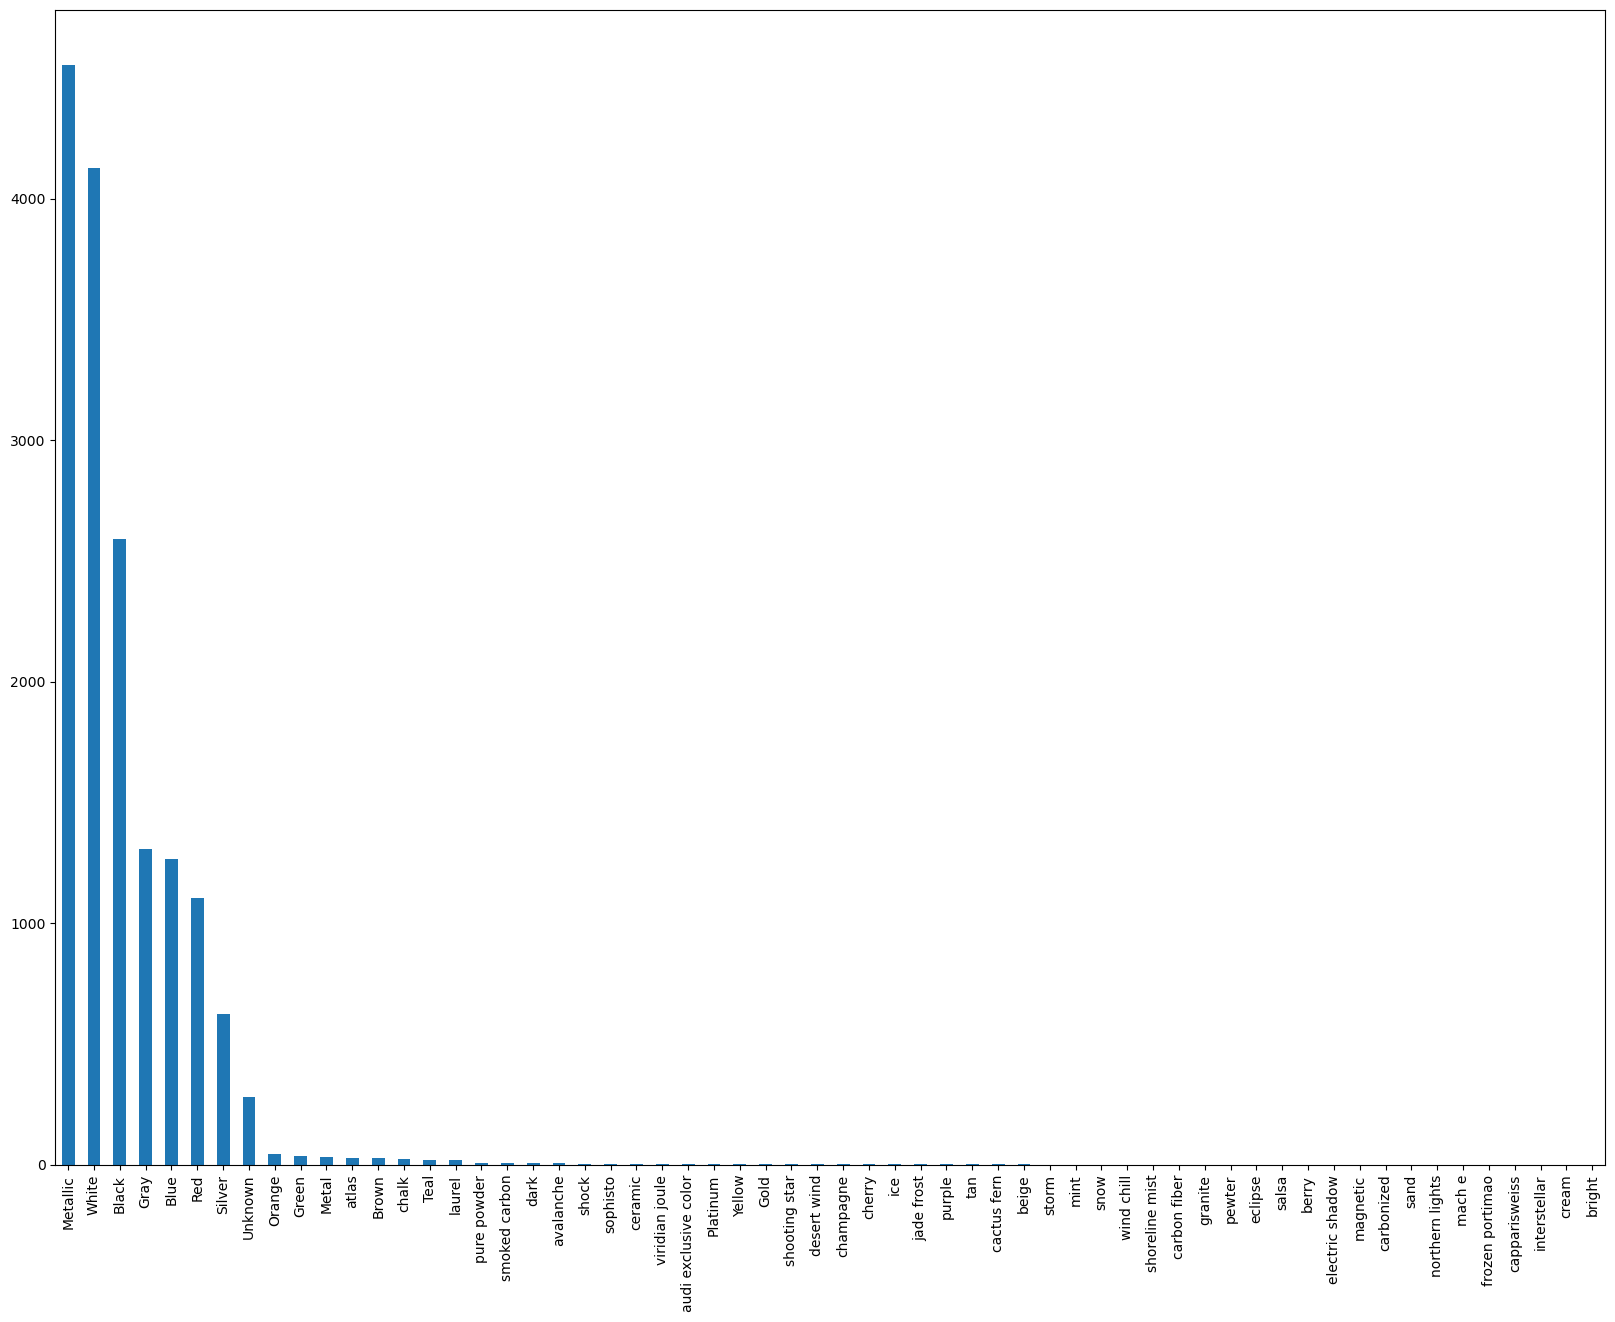

In [302]:
fig, ax = plt.subplots(1, figsize = (20,15))
electric_cars.exterior_color.value_counts().plot(kind='bar')


<Axes: >

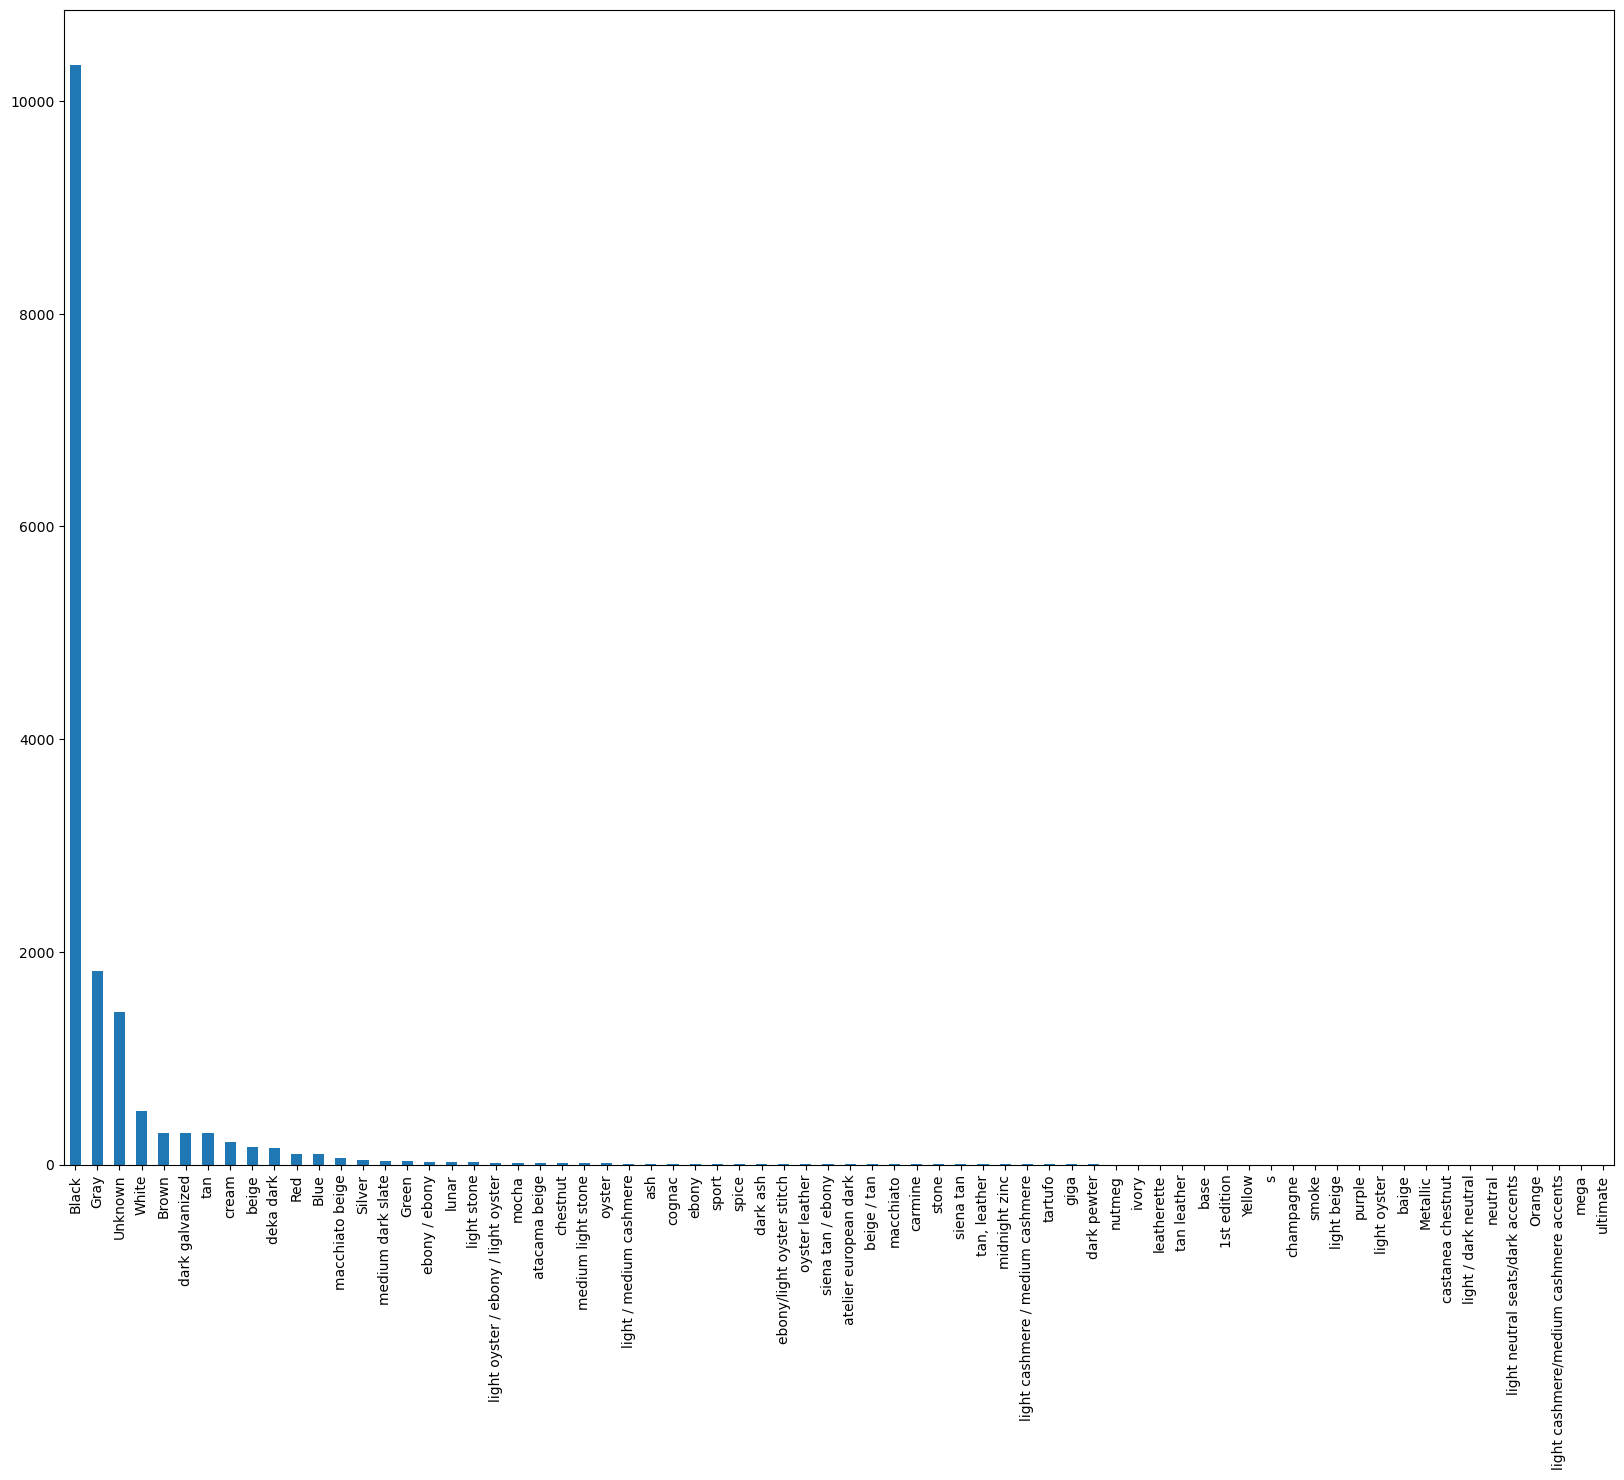

In [303]:
fig, ax = plt.subplots(1, figsize = (20,15))
electric_cars.interior_color.value_counts().plot(kind='bar')

Next, lets address the missing values in the accidents_or_damage, one_owner, personal_use_only, and price drop features. For these values, we will just insert -1 for the values that are not known. It would be hard to predict these values accurately 

In [304]:
columns_with_nan = ['accidents_or_damage','one_owner','personal_use_only','price_drop']

In [305]:
electric_cars[columns_with_nan] = electric_cars[columns_with_nan].fillna(-1)

We have two columns with nan values left, the seller and driver ratings. To come up with accurate ratings to fill in, we will calculate the average rating for the model. If no cars of the same model have a rating, we will use the average rating of the manufacturer. 

In [306]:
#using the groupby method to find the average price of each model and manufacturer
average_seller_rating_model = electric_cars.groupby(['manufacturer','model'])['seller_rating'].mean()
average_seller_rating_manuf = electric_cars.groupby(['manufacturer'])['seller_rating'].mean()

average_driver_rating_model = electric_cars.groupby(['manufacturer','model'])['driver_rating'].mean()
average_driver_rating_manuf = electric_cars.groupby(['manufacturer'])['driver_rating'].mean()

In [326]:
average_seller_rating_model

manufacturer  model                                    
Audi          Q4 e-tron 40 Premium Plus                    4.000000
              Q4 e-tron 50 Premium                         4.133333
              Q4 e-tron 50 Premium Plus                    4.228571
              Q4 e-tron 50 Prestige                        4.400000
              Q4 e-tron Prestige 50 quattro                4.500000
                                                             ...   
Volvo         XC40 Recharge Pure Electric P8 Ultimate      3.300000
              XC40 Recharge Pure Electric Plus             4.300000
              XC40 Recharge Pure Electric Twin Plus        4.800000
              XC40 Recharge Pure Electric Twin Ultimate    4.437500
              XC40 Recharge Pure Electric Ultimate         2.700000
Name: seller_rating, Length: 346, dtype: float64

In [307]:
#using the apply method with a lambda function to fill in the missing values of each rating column with the average rating values of the model and manufacturer
electric_cars['seller_rating'] = electric_cars.apply(lambda row: average_seller_rating_model.loc[row['manufacturer'], row['model']] if pd.isna(row['seller_rating']) else row['seller_rating'], axis=1)
electric_cars['seller_rating'] = electric_cars.apply(lambda row: average_seller_rating_manuf.loc[row['manufacturer']] if pd.isna(row['seller_rating']) else row['seller_rating'], axis=1)

electric_cars['driver_rating'] = electric_cars.apply(lambda row: average_driver_rating_model.loc[row['manufacturer'], row['model']] if pd.isna(row['driver_rating']) else row['driver_rating'], axis=1)
electric_cars['driver_rating'] = electric_cars.apply(lambda row: average_driver_rating_manuf.loc[row['manufacturer']] if pd.isna(row['driver_rating']) else row['driver_rating'], axis=1)

#For the driver ratings, after we applied both the model and manufacturer average ratings, there were still 3 missing values. We will fill these with -1.
electric_cars['driver_rating'].fillna(-1, inplace=True)

In [327]:
electric_cars.head()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,...,interior_color_siena_tan___ebony,interior_color_smoke,interior_color_spice,interior_color_sport,interior_color_stone,interior_color_tan,interior_color_tan_leather,interior_color_tan__leather,interior_color_tartufo,interior_color_ultimate
8497,2022,1502.0,0.0,1.0,1.0,4.700000,4.501505,0.0,6000.0,132880.0,...,0,0,0,0,0,0,0,0,0,0
8498,2022,11020.0,0.0,1.0,1.0,3.800000,4.501505,0.0,10000.0,119985.0,...,0,0,0,0,0,0,0,0,0,0
8499,2022,6741.0,0.0,1.0,0.0,3.300000,4.501505,0.0,3020.0,116980.0,...,0,0,0,0,0,0,0,0,0,0
8500,2022,7822.0,0.0,1.0,1.0,4.900000,4.501505,0.0,905.0,118820.0,...,0,0,0,0,0,0,0,0,0,0
8502,2022,2319.0,0.0,1.0,1.0,4.415625,4.501505,0.0,-1.0,137888.0,...,0,0,0,0,0,0,0,0,0,0


Lets make the dummy variables for the categorical columns now.

In [308]:
def get_dummies(df, column):
    '''
    This function creates dummy variables for a given column and adds them to the dataframe.

    Parameters:
    df (dataframe): The dataframe
    column (str): The column to create dummy variables for

    Returns:
    dataframe: The dataframe with the dummy variables added
    '''
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [309]:
#Selecting the columns that only contain string values
string_columns = electric_cars.select_dtypes(include=['object']).columns.tolist()

#Creating dummy variables for each of the string columns
for column in string_columns:
    electric_cars = get_dummies(electric_cars, column)


We need to also filter some of the feature names so that they do not include ant special characters. Some models (like lgbm) through an error when fitting the model with a training set that has special characters in the column names. We will use a regylar expression to remove any special characters from the column names and replace them with an underscore.

In [310]:
electric_cars.columns = electric_cars.columns.str.replace('[^a-zA-Z0-9]', '_')

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_18300\964243719.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  electric_cars.columns = electric_cars.columns.str.replace('[^a-zA-Z0-9]', '_')


<h3> Predictive Model Selection </h3>

I want to create a model that can predict the price of electric vehicles. We will need to test several different models in order to see which one performs the best.

Lets prepare the train and test datasets first.

In [311]:
X_train, X_test, y_train, y_test = train_test_split(electric_cars.drop('price', axis=1), electric_cars['price'], test_size=0.25, random_state=42)

Next lets establish a baseline to compare the results of our predictive model against. For this dataset, I will use root-mean-square error (RMSE) as the metric to compare the models. RMSE is a good metric to use when the dataset has outliers. The RMSE is the square root of the average of the squared differences between the predicted and actual values. The lower the RMSE, the better the model. I decided to divide the RSME by the mean of the price to get a percentage. This will make it easier to compare the RMSE of the two models.

In [312]:
baseline = y_train.mean()

#rmse_baseline = np.sqrt(np.sum(np.square(baseline-y_test))/len(y_test))/electric_cars['price'].mean()

mae_baseline = np.average(np.abs(y_test-baseline))

print('The baseline error is: {}'.format(mae_baseline))

The baseline error is: 19426.06077140194


Now lets try out some different models and see which one performs the best. I will try out the following models:

**1.** Support Vector Regression

**2.** Random Forest Regression

**3.** Light Gradient Boosting Regression

**4.** K-Nearest Neighbors Regression

**5.** Linear Regression

In [313]:
def model_error(model, X_train, y_train, X_test, y_test):
    '''
    This function calculates the RMSE of a given model.

    Parameters:
    model (model): The model to calculate the RMSE for
    X_train (dataframe): The training data
    y_train (series): The training labels
    X_test (dataframe): The test data
    y_test (series): The test labels

    Returns:
    float: The RMSE of the model
    '''
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #rmse = np.sqrt(np.sum(np.square(predictions-y_test))/len(y_test))/electric_cars['price'].mean()
    mae = np.average(np.abs(y_test-predictions))
    return mae

In [314]:
SVR_model = SVR()
SVR_error = model_error(SVR_model, X_train, y_train, X_test, y_test)
print('The error of the SVR model is: {}'.format(SVR_error))

The error of the SVR model is: 18431.813903630646


In [315]:
RFR_model = RandomForestRegressor(random_state=42)
RFR_error = model_error(RFR_model, X_train, y_train, X_test, y_test)
print('The error of the Random Forest Regressor model is: {}'.format(RFR_error))

The error of the Random Forest Regressor model is: 2778.7993137998774


In [316]:
LGB_model = lgb.LGBMRegressor(random_state=42)
LGB_error = model_error(LGB_model, X_train, y_train, X_test, y_test)
print('The error of the Light Gradient Boosting Regressor model is: {}'.format(LGB_error))

The error of the Light Gradient Boosting Regressor model is: 3215.429431137436


In [317]:
knn_model = KNeighborsRegressor()
knn_error = model_error(knn_model, X_train, y_train, X_test, y_test)
print('The error of the K Nearest Neighbors Regressor model is: {}'.format(knn_error))

The error of the K Nearest Neighbors Regressor model is: 17632.297776679843


In [318]:
linear_model = LinearRegression()
linear_error = model_error(linear_model, X_train, y_train, X_test, y_test)
if linear_error > 50000:
    linear_error = 50000
print('The error of the Linear Regression model reached the cap at: {}'.format(linear_error))

The error of the Linear Regression model reached the cap at: 50000


Now lets see a visual of how the RSME of each model compares to the baseline.

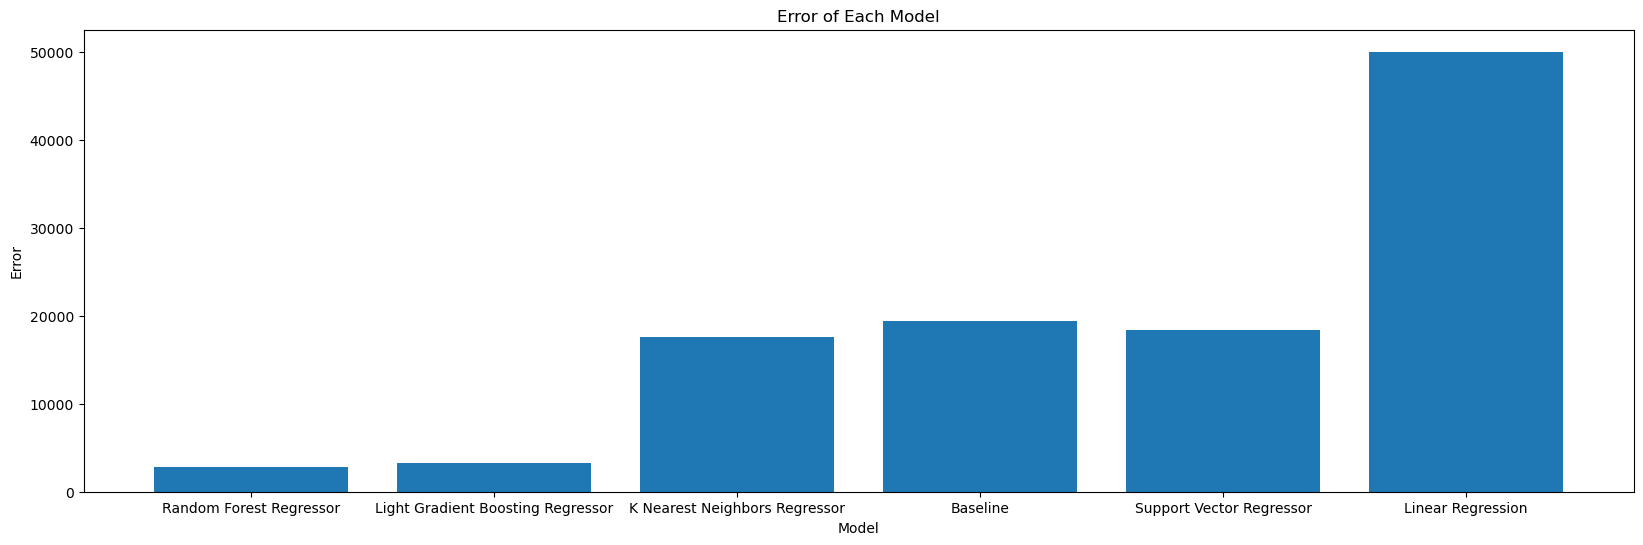

In [319]:
error = [RFR_error, LGB_error, knn_error, mae_baseline, SVR_error, linear_error]

fig, ax = plt.subplots(1, figsize = (20,6))
ax.bar(['Random Forest Regressor', 'Light Gradient Boosting Regressor', 'K Nearest Neighbors Regressor', 'Baseline', 'Support Vector Regressor', 'Linear Regression'], error)
ax.set_title('Error of Each Model')
ax.set_xlabel('Model')
ax.set_ylabel('Error')
plt.show()

As you can tell from the graph above, the two best models by far are the Random Forest Regressor and Light Gradient Boosting Regressor. Eventhough the random forest model performed better than the light gradient model, the light gradient model was approximently 62 times faster to compute. Lets see if we can improve the performance of these models by tuning the hyperparameters. Lets tune the random forest first.

In [320]:
#Creating a dictionary of hyperparameters to test
n_estimators = [100,200,300]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2,4,6]
min_samples_leaf = [1,2,4]

hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

#combining the training and test data to perform cross validation
hyper_X = pd.concat([X_train, X_test])
hyper_Y = pd.concat([y_train, y_test])

#Creating the RandomizedSearchCV object
rf_randomCV = RandomizedSearchCV(estimator=RFR_model, param_distributions=hyperparameters, n_iter=25, cv=4, verbose=1, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, return_train_score=True)

#Fitting the model
rf_randomCV.fit(hyper_X, hyper_Y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


c:\Users\LocalAdmin\anaconda3\envs\CAR1\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=1)

In [321]:
#calculating the MAE of the best model
mae_rf_randomCV = model_error(rf_randomCV.best_estimator_, X_train, y_train, X_test, y_test)

print('The error of the Random Forest Regressor model is: {}'.format(mae_rf_randomCV))
print('The percent difference from the original model is: {}%'.format(round(((RFR_error-mae_rf_randomCV)/RFR_error)*100, 2)))

c:\Users\LocalAdmin\anaconda3\envs\CAR1\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


The error of the Random Forest Regressor model is: 2762.554401307216
The percent difference from the original model is: 0.58%


When we tuned the hyperparameters for the Random Forest model, it did improve our error, but only by 0.8% and it also tripled our models runtime. Lets see what happens when we tune the hyperparameters for the Light Gradient Boosting model.

In [322]:
lgbm_hyperparameters = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'min_child_samples': [5, 10, 20], 'max_depth': [-1, 5, 8, 10], 'num_leaves': [20,40,60,80,100], 'reg_alpha': [0, 0.01, 0.03]}
lgbm_randomCV = RandomizedSearchCV(estimator=LGB_model, param_distributions=lgbm_hyperparameters, n_iter=25, cv=5, verbose=1, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, return_train_score=True)

In [323]:
lgbm_randomCV.fit(hyper_X, hyper_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [-1, 5, 8, 10],
                                        'min_child_samples': [5, 10, 20],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [0, 0.01, 0.03]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=1)

In [324]:
mae_lgbm_randomCV = model_error(lgbm_randomCV.best_estimator_, X_train, y_train, X_test, y_test)

print("The error of the Light Gradient Boosting Regressor model is: {}".format(mae_lgbm_randomCV))
print('The percent difference from the original model is: {}%'.format(round(((LGB_error-mae_lgbm_randomCV)/LGB_error)*100, 2)))

The error of the Light Gradient Boosting Regressor model is: 2897.207664217958
The percent difference from the original model is: 9.9%


The Light Gradient Boosting model improved by aproximently 10% when we tuned the hyperparameters, and is still relativley quick (.3s original compute time vs .4 tuned compute time). If given the choice between the two models, I would choose the Light Gradient Boosting model in cases where compute power is limited because of how much more efficent it is compared to the Random Forest model. Its more than 50 times faster and the error is only slightly higher. If there was unlimited compute power available, then it seems like the random forest model gives the best results.